Actual Sent code and its results are below, this one has gaussian as smotthing filter and sobel operator.

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Set high and low threshold ratios
highThresholdRatio = 0.17
lowThresholdRatio = 0.12

# Load image
img = cv.imread('Lenna.png')

# Convert to grayscale
img = cv.cvtColor(np.float32(img), cv.COLOR_BGR2GRAY)

In [48]:
# Apply Gaussian filter
img_smooth = cv.GaussianBlur(img, (5,5), 1)

After the smoothing step, the image becomes less noisy, and the edges become smoother. This is because the Gaussian filter is applied, which blurs the image and reduces high-frequency noise.

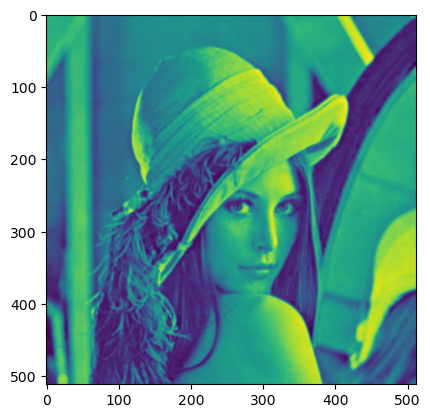

In [50]:
plt.imshow(img_smooth)

In [54]:
# Calculate gradient magnitude and direction
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
Gx = cv.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
Gy = cv.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)
#Gx = cv.Sobel(img_smooth, cv.CV_64F, 1, 0, ksize=3)
#Gy = cv.Sobel(img_smooth, cv.CV_64F, 0, 1, ksize=3)
gradient_mag = np.sqrt(Gx**2 + Gy**2)
gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

# Non-maximum suppression
M, N = img.shape
nms = np.zeros((M, N), dtype=np.int32)
for i in range(1, M-1):
    for j in range(1, N-1):
        dir = gradient_dir[i, j]
        if dir < 0:
            dir += 180
        dir_round = int((dir + 22.5) / 45) % 4
        if dir_round == 0:  # East-West (horizontal)
            if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 1:  # North-East/South-West
            if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 2:  # North-South (vertical)
            if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 3:  # North-West/South-East
            if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                nms[i, j] = gradient_mag[i, j]

After calculating the gradient magnitude and direction, we get two images - one representing the magnitude of the gradient at each pixel and the other representing the direction. The gradient magnitude image highlights edges, and the gradient direction image indicates the direction of the edges.
In non-maximum suppression, the image is further processed to reduce edge thickness. It suppresses all the pixels that are not local maxima along the direction of the gradient.

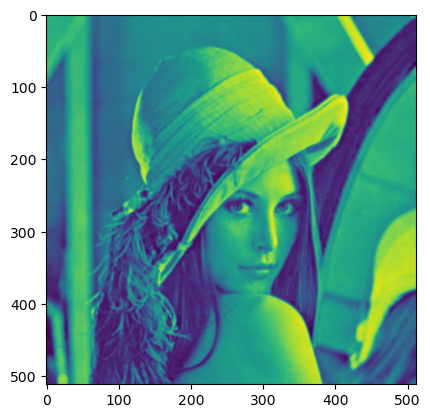

In [56]:
plt.imshow(img_smooth)

In [ ]:
# Hysteresis thresholding
high_threshold = np.max(nms) * highThresholdRatio
low_threshold = high_threshold * lowThresholdRatio
strong_edges = nms > high_threshold
weak_edges = (nms > low_threshold) & (nms < high_threshold)
for i in range(1, M-1):
    for j in range(1, N-1):
        if weak_edges[i, j]:
            if strong_edges[i-1:i+2, j-1:j+2].any():
                strong_edges[i, j] = True
                weak_edges[i, j] = False

In hysteresis thresholding, the image is segmented into strong edges and weak edges based on the thresholds defined. The pixels with values above the high threshold are considered strong edges, while pixels with values between the high and low threshold are considered weak edges. The weak edges that are connected to strong edges are also considered as strong edges. Finally, the strong edges are displayed as an output image.

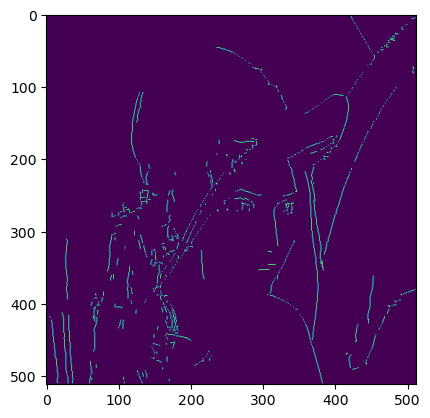

In [57]:
# Display edges
plt.imshow(strong_edges)

### Applying bilateral filter instead of gaussian filter

In the code below, the bilateral filter is applied to the grayscale image before performing edge detection. The parameters of the filter are set to a window size of 9 and the spatial and color standard deviations of 75. These values can be adjusted to control the amount of smoothing and edge preservation in the image. After smoothing, the code applies the Sobel operator to calculate the gradient magnitude and direction, performs non-maximum suppression to thin out the edges, and then applies hysteresis thresholding to identify strong edges above a high threshold and weak edges between the high and low thresholds.
The resulting strong edges are displayed using plt.imshow(). The effect of bilateral smoothing on the final output was that the preservation of edge details improved.

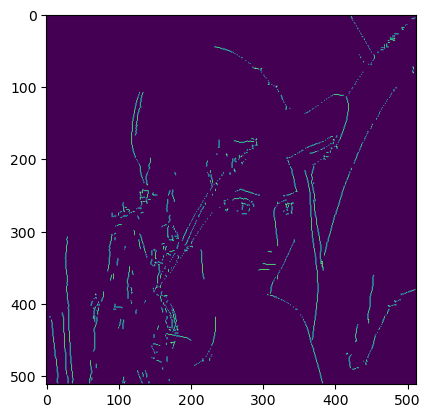

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Set high and low threshold ratios
highThresholdRatio = 0.17
lowThresholdRatio = 0.12

# Load image
img = cv.imread('Lenna.png')

# Convert to grayscale
img = cv.cvtColor(np.float32(img), cv.COLOR_BGR2GRAY)

# Apply bilateral filter
img_smooth = cv.bilateralFilter(img,9,75,75)

# Calculate gradient magnitude and direction
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
Gx = cv.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
Gy = cv.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)
#Gx = cv.Sobel(img_smooth, cv.CV_64F, 1, 0, ksize=3)
#Gy = cv.Sobel(img_smooth, cv.CV_64F, 0, 1, ksize=3)
gradient_mag = np.sqrt(Gx**2 + Gy**2)
gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

# Non-maximum suppression
M, N = img.shape
nms = np.zeros((M, N), dtype=np.int32)
for i in range(1, M-1):
    for j in range(1, N-1):
        dir = gradient_dir[i, j]
        if dir < 0:
            dir += 180
        dir_round = int((dir + 22.5) / 45) % 4
        if dir_round == 0:  # East-West (horizontal)
            if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 1:  # North-East/South-West
            if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 2:  # North-South (vertical)
            if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 3:  # North-West/South-East
            if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                nms[i, j] = gradient_mag[i, j]

# Hysteresis thresholding
high_threshold = np.max(nms) * highThresholdRatio
low_threshold = high_threshold * lowThresholdRatio
strong_edges = nms > high_threshold
weak_edges = (nms > low_threshold) & (nms < high_threshold)
for i in range(1, M-1):
    for j in range(1, N-1):
        if weak_edges[i, j]:
            if strong_edges[i-1:i+2, j-1:j+2].any():
                strong_edges[i, j] = True
                weak_edges[i, j] = False

# Display edges
plt.imshow(strong_edges)

### Applying scharr operator instead of sobel operator

In the previous code, the Sobel filter was used to compute the gradient of the image, now the scharr filter is used and the Scharr filter is a modification of the Sobel filter that is more robust to noise and produces more accurate edges.
The Scharr filter uses a 3x3 kernel that is similar to the Sobel filter, but with different coefficients that give it better performance. In particular, the Scharr filter has a more isotropic response than the Sobel filter, which means that it is better at detecting edges that are oriented in different directions in lenna image which has edges at different angles and different orientations. Overall, using the Scharr filter instead of the Sobel filter can improve the accuracy of edge detection and reduce false edges.

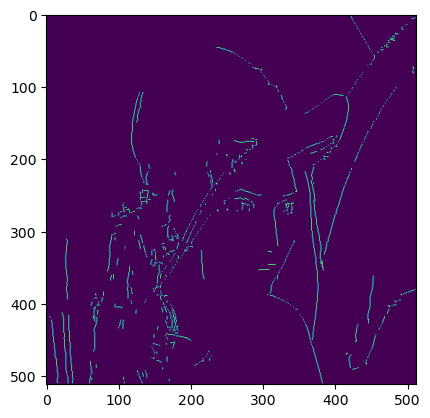

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Set high and low threshold ratios
highThresholdRatio = 0.17
lowThresholdRatio = 0.12

# Load image
img = cv.imread('Lenna.png')

# Convert to grayscale
img = cv.cvtColor(np.float32(img), cv.COLOR_BGR2GRAY)

# Apply Gaussian filter
img_smooth = cv.bilateralFilter(img,9,75,75)

# Calculate gradient magnitude and direction using Scharr filter
scharr_x = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
scharr_y = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])
Gx = cv.filter2D(src=img_smooth, kernel=scharr_x, ddepth=-1)
Gy = cv.filter2D(src=img_smooth, kernel=scharr_y, ddepth=-1)
gradient_mag = np.sqrt(Gx**2 + Gy**2)
gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

# Non-maximum suppression
M, N = img.shape
nms = np.zeros((M, N), dtype=np.int32)
for i in range(1, M-1):
    for j in range(1, N-1):
        dir = gradient_dir[i, j]
        if dir < 0:
            dir += 180
        dir_round = int((dir + 22.5) / 45) % 4
        if dir_round == 0:  # East-West (horizontal)
            if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 1:  # North-East/South-West
            if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 2:  # North-South (vertical)
            if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 3:  # North-West/South-East
            if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                nms[i, j] = gradient_mag[i, j]

# Hysteresis thresholding
high_threshold = np.max(nms) * highThresholdRatio
low_threshold = high_threshold * lowThresholdRatio
strong_edges = nms > high_threshold
weak_edges = (nms > low_threshold) & (nms < high_threshold)
for i in range(1, M-1):
    for j in range(1, N-1):
        if weak_edges[i, j]:
            if strong_edges[i-1:i+2, j-1:j+2].any():
                strong_edges[i, j] = True
                weak_edges[i, j] = False

# Display edges
plt.imshow(strong_edges)

Trying to find the optimal values of high threshold and low threshold

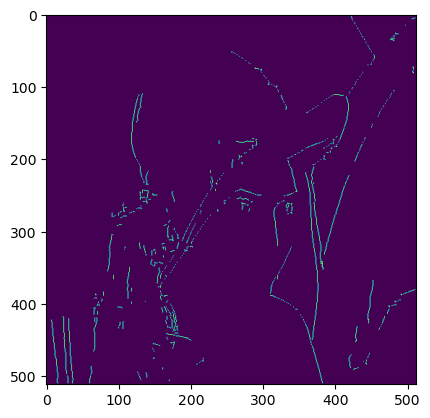

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Set high and low threshold ratios
#highThresholdRatio = 0.2
#lowThresholdRatio = 0.12
#highThresholdRatio = 0.3
#lowThresholdRatio = 0.2
#highThresholdRatio = 0.2
#lowThresholdRatio = 0.1
#highThresholdRatio = 0.2
#lowThresholdRatio = 0.19
#highThresholdRatio = 0.2
#lowThresholdRatio = 0.13

highThresholdRatio = 0.2
lowThresholdRatio = 0.12

# Load image
img = cv.imread('Lenna.png')

# Convert to grayscale
img = cv.cvtColor(np.float32(img), cv.COLOR_BGR2GRAY)

# Apply Gaussian filter
img_smooth = cv.bilateralFilter(img,9,75,75)

# Calculate gradient magnitude and direction using Scharr filter
scharr_x = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
scharr_y = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])
Gx = cv.filter2D(src=img_smooth, kernel=scharr_x, ddepth=-1)
Gy = cv.filter2D(src=img_smooth, kernel=scharr_y, ddepth=-1)
gradient_mag = np.sqrt(Gx**2 + Gy**2)
gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

# Non-maximum suppression
M, N = img.shape
nms = np.zeros((M, N), dtype=np.int32)
for i in range(1, M-1):
    for j in range(1, N-1):
        dir = gradient_dir[i, j]
        if dir < 0:
            dir += 180
        dir_round = int((dir + 22.5) / 45) % 4
        if dir_round == 0:  # East-West (horizontal)
            if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 1:  # North-East/South-West
            if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 2:  # North-South (vertical)
            if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 3:  # North-West/South-East
            if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                nms[i, j] = gradient_mag[i, j]

# Hysteresis thresholding
high_threshold = np.max(nms) * highThresholdRatio
low_threshold = high_threshold * lowThresholdRatio
strong_edges = nms > high_threshold
weak_edges = (nms > low_threshold) & (nms < high_threshold)
for i in range(1, M-1):
    for j in range(1, N-1):
        if weak_edges[i, j]:
            if strong_edges[i-1:i+2, j-1:j+2].any():
                strong_edges[i, j] = True
                weak_edges[i, j] = False

# Display edges
plt.imshow(strong_edges)

These values below 0.10 and 0.9 were having the closest results to opencv canny

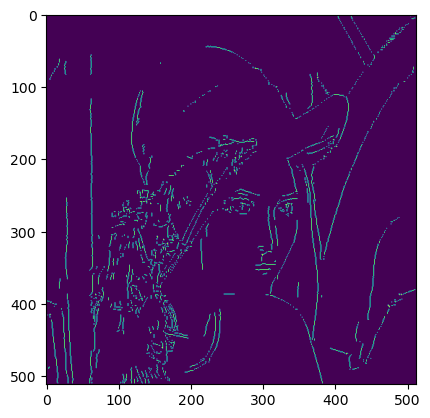

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Set high and low threshold ratios
highThresholdRatio = 0.10
lowThresholdRatio = 0.9

# Load image
img = cv.imread('Lenna.png')

# Convert to grayscale
img = cv.cvtColor(np.float32(img), cv.COLOR_BGR2GRAY)

# Apply Gaussian filter
img_smooth = cv.bilateralFilter(img,9,75,75)

# Calculate gradient magnitude and direction using Scharr filter
scharr_x = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
scharr_y = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])
Gx = cv.filter2D(src=img_smooth, kernel=scharr_x, ddepth=-1)
Gy = cv.filter2D(src=img_smooth, kernel=scharr_y, ddepth=-1)
gradient_mag = np.sqrt(Gx**2 + Gy**2)
gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

# Non-maximum suppression
M, N = img.shape
nms = np.zeros((M, N), dtype=np.int32)
for i in range(1, M-1):
    for j in range(1, N-1):
        dir = gradient_dir[i, j]
        if dir < 0:
            dir += 180
        dir_round = int((dir + 22.5) / 45) % 4
        if dir_round == 0:  # East-West (horizontal)
            if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 1:  # North-East/South-West
            if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 2:  # North-South (vertical)
            if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 3:  # North-West/South-East
            if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                nms[i, j] = gradient_mag[i, j]

# Hysteresis thresholding
high_threshold = np.max(nms) * highThresholdRatio
low_threshold = high_threshold * lowThresholdRatio
strong_edges = nms > high_threshold
weak_edges = (nms > low_threshold) & (nms < high_threshold)
for i in range(1, M-1):
    for j in range(1, N-1):
        if weak_edges[i, j]:
            if strong_edges[i-1:i+2, j-1:j+2].any():
                strong_edges[i, j] = True
                weak_edges[i, j] = False

# Display edges
plt.imshow(strong_edges)

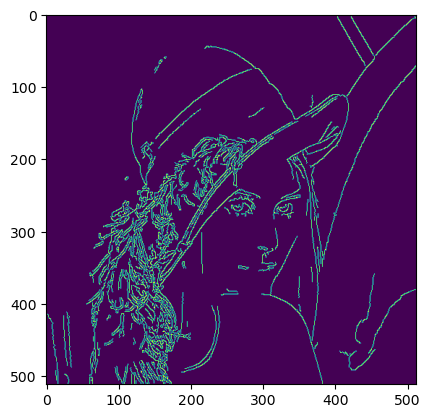

In [86]:
img = cv.imread('Lenna.png', 0)
edges = cv.Canny(img,100,200)
plt.imshow(edges)